In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# blup data
# test data - 2021 blup
blup_2021 = read.csv("/mnt/ML_HBLUP/NA_RM105_110_115/data/test_phenoData_NA_Corn_hblup_2021_ALL_UDR_105-110-115.csv")
row.names(blup_2021) = blup_2021$LINE_NAME

# train data - 2015-2020 blup
blup_train = read.csv("/mnt/ML_HBLUP/NA_RM105_110_115/data/train_phenoData_NA_Corn_hblup_2015-2020_ALL_UDR_105-110-115.csv")
row.names(blup_train) = blup_train$LINE_NAME

# lines in both test and train
print("test lines in training?")
table(blup_2021$LINE_NAME %in% blup_train$LINE_NAME)

# lines that present in both data
dupLines = blup_2021$LINE_NAME[blup_2021$LINE_NAME %in% blup_train$LINE_NAME]

# 
print("correlations for inner lines between test and train data")
cor(blup_2021[dupLines,"YLD_BE_BLUP"], blup_train[dupLines,"YLD_BE_BLUP"],use = "na.or.complete")

[1] "test lines in training?"



FALSE  TRUE 
 6100  1207 

[1] "correlations for inner lines between test and train data"


[1] 0.2108403

In [3]:
# raw phenotype data - plot level data
pheno_train = readRDS("/mnt/data/pheno_2018_2021_S1_CM.rds")

test_raw = pheno_train %>% filter(field_year == 2021, testset_exp_stage_ref_id %in% c("P1","P2","P2.5","P3","P4"))%>% 
                          select(germ_origin,field_id,testset_exp_stage_ref_id,testset_id,rep_id,field_year,plot_id,obs_value_YLD)
 
train_raw = pheno_train %>% filter(field_year == c(2018,2019,2020), testset_exp_stage_ref_id %in% c("P1","P2","P2.5","P3","P4"))  %>% 
  select(germ_origin,field_id,testset_exp_stage_ref_id,testset_id,rep_id,field_year,plot_id,obs_value_YLD)
 
dup_train_raw = pheno_train %>% filter(field_year == c(2018,2019,2020), testset_exp_stage_ref_id %in% c("P1","P2","P2.5","P3","P4"), 
                                       germ_origin %in% dupLines)  %>% 
  select(germ_origin,field_id,testset_exp_stage_ref_id,testset_id,rep_id,field_year,plot_id,obs_value_YLD)

In [4]:
dim(pheno_train);dim(test_raw);dim(train_raw)

[1] 3431706      29

[1] 307779      8

[1] 278870      8

In [5]:
test_raw_mean = as.data.frame(test_raw %>% group_by(germ_origin) %>% summarise(avg_yld_2021 = mean(obs_value_YLD,na.rm=T)))
row.names(test_raw_mean) = test_raw_mean$germ_origin

train_raw_mean = as.data.frame(train_raw %>% group_by(germ_origin) %>% summarise(avg_yld_3y = mean(obs_value_YLD,na.rm=T)))
row.names(train_raw_mean) = train_raw_mean$germ_origin
 
test_raw_mean$avg_yld_3y = train_raw_mean[test_raw_mean$germ_origin,"avg_yld_3y"]
test_raw_mean$blup_yld_2021= blup_2021[test_raw_mean$germ_origin,"YLD_BE_BLUP"]
test_raw_mean$blup_yld_6y= blup_train[test_raw_mean$germ_origin,"YLD_BE_BLUP"]

cor(test_raw_mean[,2:5],use = "na.or.complete")
cor(test_raw_mean[,2:5],method = "spearman",use = "na.or.complete")

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y
avg_yld_2021,1.0000000,0.4949839,0.4174904,0.6829072
avg_yld_3y,0.4949839,1.0000000,0.1543501,0.7024779
blup_yld_2021,0.4174904,0.1543501,1.0000000,0.1976570
blup_yld_6y,0.6829072,0.7024779,0.1976570,1.0000000


,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y
avg_yld_2021,1.0000000,0.5528339,0.3915541,0.7222540
avg_yld_3y,0.5528339,1.0000000,0.1414819,0.7320952
blup_yld_2021,0.3915541,0.1414819,1.0000000,0.1961370
blup_yld_6y,0.7222540,0.7320952,0.1961370,1.0000000


In [6]:
dim(test_raw_mean);dim(train_raw_mean)
head(test_raw_mean)

[1] 16238     5

[1] 41338     2

,germ_origin,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
01DHD10+LH287,01DHD10+LH287,197.4222,212.5745,NA,-15.661
01DHD16+83INI14,01DHD16+83INI14,183.8176,201.1073,NA,-41.839
01DKD2+19HGZ1,01DKD2+19HGZ1,193.8814,226.3426,NA,-5.917
01DKD2+80IDM2,01DKD2+80IDM2,215.9325,224.6698,NA,-4.271
01DKD2+93IDI3,01DKD2+93IDI3,204.4074,201.1833,NA,-14.926
01DKD2+LH283,01DKD2+LH283,202.8045,206.4499,NA,-16.385


In [7]:
table(test_raw_mean$germ_origin %in% train_raw_mean$germ_origin)


FALSE  TRUE 
13845  2393 

In [8]:
## run lightGBM
#store the default path to packages
default_lib_path <- .libPaths()
#after this, you need to crate an folder to store packages. Here I create /mnt/custom_lib
#Then we tell R to use search/install packages in my local folder be default. Then assign the system default folder as secondary. So we can get pre-installed packages.
.libPaths(unique(c("/mnt/custom_lib/", default_lib_path)))
 
install.packages(
  "lightgbm"
  # , type = "both"
  , repos = "https://cran.r-project.org"
)
 
library(lightgbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: R6


Attaching package: ‘lightgbm’


The following object is masked from ‘package:dplyr’:

    slice




# Using HBLUP data for training 

In [9]:
# read haplotype data
train_hap = readRDS("/mnt/ML_HBLUP/NA_RM105_110_115/data/train_haplotypeData_NA_Corn_hblup_2015-2020_ALL_UDR_105-110-115.rds")
dim(train_hap)
test_hap = readRDS("/mnt/ML_HBLUP/NA_RM105_110_115/data/test_haplotypeData_NA_Corn_hblup_2021_ALL_UDR_105-110-115.rds")
 
table(row.names(train_hap) == row.names(blup_train))
table(row.names(test_hap) == row.names(blup_2021))
 
trainIndex = which(!is.na(blup_train$YLD_BE_BLUP))
train_hap = train_hap[trainIndex,]
blup_train = blup_train[trainIndex,]

[1]  33567 103821


 TRUE 
33567 


TRUE 
7307 

In [23]:
### run lightGBM
num_leaves = 31
nrounds = 1000
corTrain = as.numeric()
corVal = as.numeric()
 
# Set parameters for model training
train_params <- list(
  num_leaves = num_leaves
  , learning_rate = 0.1
  , objective = "regression"
  , nthread = 32L,
  boosting = 'dart',
  bagging_fraction =  0.7,
  feature_fraction = 0.5
)

In [24]:
bst <- lightgbm(
  data = as.matrix(train_hap) 
  , params = train_params
  , label = blup_train$YLD_BE_BLUP
  , nrounds = nrounds
  , verbose = 0
)
 
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_",num_leaves,"_",nrounds,".txt"))

Warning message in (function (params = list(), data, nrounds = 100L, valids = list(), :
“Early stopping is not available in 'dart' mode.”


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 30.215869 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [11]:
#bst = lgb.load(filename=paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_",num_leaves,"_",nrounds,".txt")) 

In [25]:
table(test_raw_mean$germ_origin %in% row.names(test_hap)) # lines with raw data in test_hap
table(test_raw_mean$germ_origin %in% row.names(train_hap))
table(test_raw_mean$germ_origin %in% c(row.names(test_hap),row.names(train_hap)))


FALSE  TRUE 
 9281  6957 


FALSE  TRUE 
15084  1154 


FALSE  TRUE 
 9193  7045 

In [26]:
table(row.names(train_hap) %in% train_raw_mean$germ_origin)
table(row.names(test_hap) %in% test_raw_mean$germ_origin)


FALSE  TRUE 
10284 23191 


FALSE  TRUE 
  350  6957 

[1] "train: 0.962;test: 0.106"


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,corr
<chr>,<dbl>
no,0.0939653
yes,0.1706981


,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap
avg_yld_2021,1.0000000,0.4949839,0.4174904,0.6829072,0.6751705
avg_yld_3y,0.4949839,1.0000000,0.1543501,0.7024779,0.6714580
blup_yld_2021,0.4174904,0.1543501,1.0000000,0.1976570,0.1548399
blup_yld_6y,0.6829072,0.7024779,0.1976570,1.0000000,0.9667927
pred_hap,0.6751705,0.6714580,0.1548399,0.9667927,1.0000000


,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap
avg_yld_2021,1.0000000,0.5528339,0.3915541,0.7222540,0.7184197
avg_yld_3y,0.5528339,1.0000000,0.1414819,0.7320952,0.6925159
blup_yld_2021,0.3915541,0.1414819,1.0000000,0.1961370,0.1397183
blup_yld_6y,0.7222540,0.7320952,0.1961370,1.0000000,0.9588923
pred_hap,0.7184197,0.6925159,0.1397183,0.9588923,1.0000000


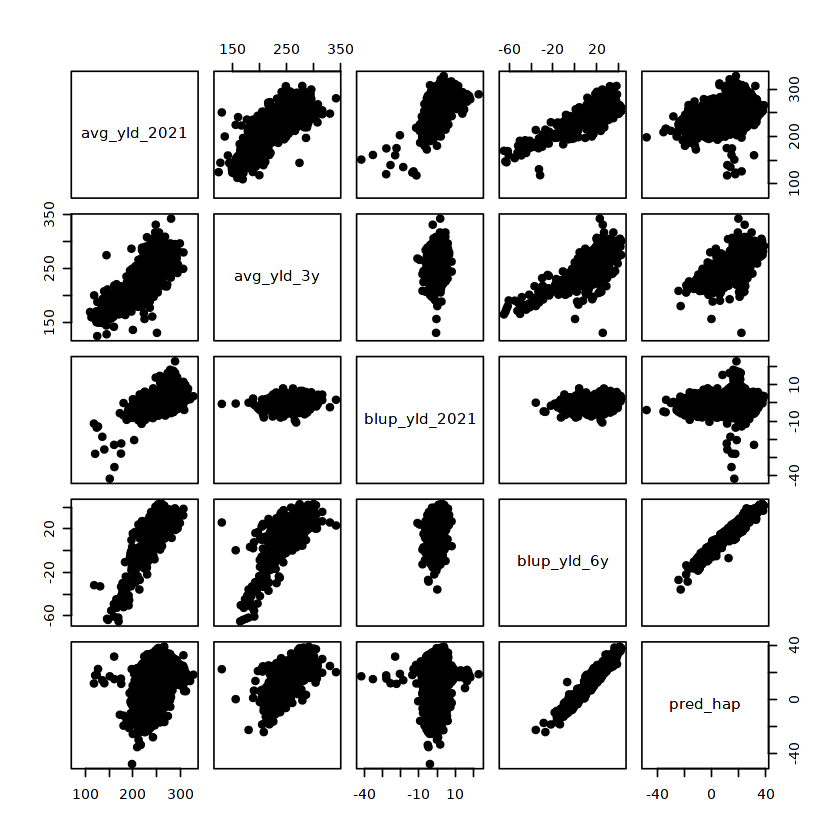

In [27]:
pred_train <- predict(bst, as.matrix(train_hap))
pred_test <- predict(bst, as.matrix(test_hap))
 
print(paste0("train: ",round(cor(pred_train,blup_train$YLD_BE_BLUP),3),
             ";test: ",round(cor(pred_test,blup_2021$YLD_BE_BL),3)))
 
blup_2021$pred_hap = pred_test
blup_2021$inTrain = ifelse(blup_2021$LINE_NAME %in% dupLines,"yes","no")
blup_2021 %>% group_by(inTrain) %>% summarise(corr = cor(YLD_BE_BLUP,pred_hap,use = "na.or.complete"))
 
test_raw_mean$pred_hap = blup_2021[test_raw_mean$germ_origin,"pred_hap"]
cor(test_raw_mean[,2:6],use = "na.or.complete")
cor(test_raw_mean[,2:6],method = "spearman",use = "na.or.complete")
 
pairs(test_raw_mean[,2:6], pch = 19)

In [28]:
test_raw_mean$inTrain = test_raw_mean$germ_origin %in% dupLines

In [29]:
head(test_raw_mean)

,germ_origin,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap,inTrain,pred_hap_avg
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
01DHD10+LH287,01DHD10+LH287,197.4222,212.5745,NA,-15.661,NA,FALSE,NA
01DHD16+83INI14,01DHD16+83INI14,183.8176,201.1073,NA,-41.839,NA,FALSE,NA
01DKD2+19HGZ1,01DKD2+19HGZ1,193.8814,226.3426,NA,-5.917,NA,FALSE,NA
01DKD2+80IDM2,01DKD2+80IDM2,215.9325,224.6698,NA,-4.271,NA,FALSE,NA
01DKD2+93IDI3,01DKD2+93IDI3,204.4074,201.1833,NA,-14.926,NA,FALSE,NA
01DKD2+LH283,01DKD2+LH283,202.8045,206.4499,NA,-16.385,NA,FALSE,NA


## pred_hBLUP vs avg_yld

In [30]:
# correlations by group (inTrain); avg_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2021),!is.na(pred_hap)) %>% group_by(inTrain) %>% 
                summarise(cor_avgTest_pred = cor(avg_yld_2021,pred_hap), numOfLines = length(avg_yld_2021))

# correlations by group (inTrain); blup_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(blup_yld_2021),!is.na(pred_hap)) %>% group_by(inTrain) %>% 
                summarise(cor_blup2021_pred = cor(blup_yld_2021,pred_hap), numOfLines = length(blup_yld_2021))

# correlations by group (inTrain); blup_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(blup_yld_6y),!is.na(pred_hap)) %>% group_by(inTrain) %>% 
                summarise(cor_blup6y_pred = cor(blup_yld_6y,pred_hap), numOfLines = length(blup_yld_6y))

# correlations by group (inTrain); avg_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_3y),!is.na(pred_hap)) %>% group_by(inTrain) %>% 
                summarise(cor_avg3y_pred = cor(avg_yld_3y,pred_hap), numOfLines = length(avg_yld_3y))


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3780309,5891
TRUE,0.6793126,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_blup2021_pred,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.09081867,5891
TRUE,0.15808368,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_blup6y_pred,numOfLines
<lgl>,<dbl>,<int>
FALSE,NA,1
TRUE,0.967489,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg3y_pred,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.9946362,4
TRUE,0.6716055,1053


# Using raw data for training - but only a subset line with HapData

In [31]:
table(row.names(train_hap) %in% train_raw_mean$germ_origin)


FALSE  TRUE 
10284 23191 

In [32]:
rawTrainLines = row.names(train_hap)[row.names(train_hap) %in% train_raw_mean$germ_origin]
bst <- lightgbm(
  data = as.matrix(train_hap[rawTrainLines,]) 
  , params = train_params
  , label = train_raw_mean[rawTrainLines,"avg_yld_3y"]
  , nrounds = nrounds
  , verbose = 0
)
 
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_",num_leaves,"_",nrounds,"_avg_yld_3y.txt"))

Warning message in (function (params = list(), data, nrounds = 100L, valids = list(), :
“Early stopping is not available in 'dart' mode.”


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 22.628708 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [19]:
#bst = lgb.load(filename=paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_",num_leaves,"_",nrounds,"_avg_yld_3y.txt")) 

,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap,pred_hap_avg
avg_yld_2021,1.0000000,0.4949839,0.4174904,0.6829072,0.6751705,0.6171183
avg_yld_3y,0.4949839,1.0000000,0.1543501,0.7024779,0.6714580,0.8214882
blup_yld_2021,0.4174904,0.1543501,1.0000000,0.1976570,0.1548399,0.1420050
blup_yld_6y,0.6829072,0.7024779,0.1976570,1.0000000,0.9667927,0.8436640
pred_hap,0.6751705,0.6714580,0.1548399,0.9667927,1.0000000,0.8697954
pred_hap_avg,0.6171183,0.8214882,0.1420050,0.8436640,0.8697954,1.0000000


,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap,pred_hap_avg
avg_yld_2021,1.0000000,0.5528339,0.3915541,0.7222540,0.7184197,0.6652901
avg_yld_3y,0.5528339,1.0000000,0.1414819,0.7320952,0.6925159,0.8275709
blup_yld_2021,0.3915541,0.1414819,1.0000000,0.1961370,0.1397183,0.1304269
blup_yld_6y,0.7222540,0.7320952,0.1961370,1.0000000,0.9588923,0.8492677
pred_hap,0.7184197,0.6925159,0.1397183,0.9588923,1.0000000,0.8794879
pred_hap_avg,0.6652901,0.8275709,0.1304269,0.8492677,0.8794879,1.0000000


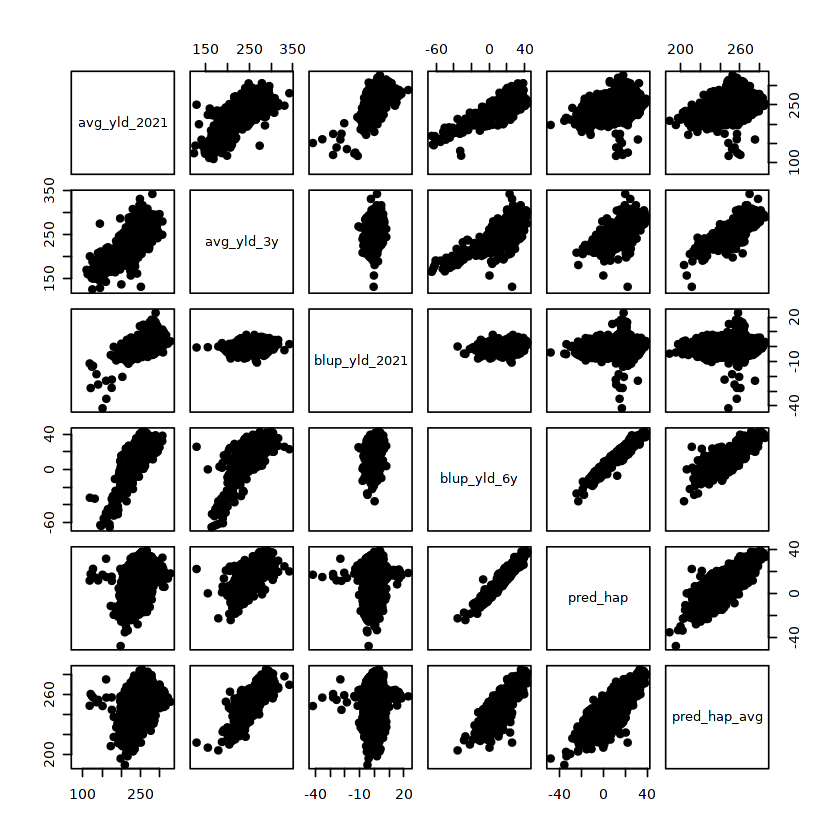

In [33]:
# pair-wise correlation in test data
pred_test <- predict(bst, as.matrix(test_hap))
 
blup_2021$pred_hap_avg = pred_test
test_raw_mean$pred_hap_avg = blup_2021[test_raw_mean$germ_origin,"pred_hap_avg"]
cor(test_raw_mean[,c(2:6,8)],use = "na.or.complete")
cor(test_raw_mean[,c(2:6,8)],method = "spearman",use = "na.or.complete")
pairs(test_raw_mean[,c(2:6,8)], pch = 19)

In [34]:
# correlations by group (inTrain); avg_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2021),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_avgTest_pred_avg = cor(avg_yld_2021,pred_hap_avg), numOfLines = length(avg_yld_2021))

# correlations by group (inTrain); blup_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(blup_yld_2021),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_blup2021_pred_avg = cor(blup_yld_2021,pred_hap_avg), numOfLines = length(blup_yld_2021))

# correlations by group (inTrain); blup_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(blup_yld_6y),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_blup6y_pred_avg = cor(blup_yld_6y,pred_hap_avg), numOfLines = length(blup_yld_6y))

# correlations by group (inTrain); avg_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_3y),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_avg3y_pred_avg = cor(avg_yld_3y,pred_hap_avg), numOfLines = length(avg_yld_3y))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3801589,5891
TRUE,0.6175143,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_blup2021_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.08047371,5891
TRUE,0.14444352,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_blup6y_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,NA,1
TRUE,0.841977,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg3y_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.879349,4
TRUE,0.821491,1053


In [35]:
rawTrainLines = row.names(train_hap)[row.names(train_hap) %in% train_raw_mean$germ_origin]
pred_train <- predict(bst, as.matrix(train_hap[rawTrainLines,]))
print(paste0("train: ",round(cor(pred_train,train_raw_mean[rawTrainLines,"avg_yld_3y"]),3)))

[1] "train: 0.823"


# Sub-Environment 

In [51]:
### subgroup by environment
library(readxl)
envC = as.data.frame(read_excel("/mnt/data/haplotype_esv1.xlsx",sheet = "in"))
field_env = envC$environmental_scenario_v1
names(field_env) = as.character(envC$field_id)
train_raw$envC = field_env[as.character(train_raw$field_id)]
head(sort(table(train_raw$envC),decreasing = T))
test_raw$envC = field_env[as.character(test_raw$field_id)]
head(sort(table(test_raw$envC),decreasing = T))



21_21  8_28  8_21  2_27 21_28  21_4 
17782 13773 10428  9577  8664  8425 


 8_21 21_21  16_1   2_1 21_26  16_6 
26163 20520 18489 16234 16173 13848 

In [52]:
testEnv = "21_21"
sub_train_raw = as.data.frame(train_raw %>% filter(envC == testEnv,germ_origin %in% row.names(train_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_train = mean(obs_value_YLD,na.rm=T)))
row.names(sub_train_raw) = sub_train_raw$germ_origin
 
sub_test_raw = as.data.frame(test_raw %>% filter(envC == testEnv,germ_origin %in% row.names(test_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_test = mean(obs_value_YLD,na.rm=T)))
row.names(sub_test_raw) = sub_test_raw$germ_origin
 
sub_test_raw$inTrain = sub_test_raw$germ_origin %in% sub_train_raw$germ_origin
sub_test_raw$avg_yld_train = sub_train_raw[sub_test_raw$germ_origin,"avg_yld_train"]
sub_test_raw$blup_yld_3y = blup_train[sub_test_raw$germ_origin,"YLD_BE_BLUP"]
sub_test_raw$blup_yld_2021 = blup_2021[sub_test_raw$germ_origin,"YLD_BE_BLUP"]

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [53]:
dim(sub_train_raw)
dim(sub_test_raw)

[1] 8004    2

[1] 4612    6

In [54]:
head(sub_train_raw)

,germ_origin,avg_yld_train
,<chr>,<dbl>
01DHD10+LH287,01DHD10+LH287,219.8352
01DHD16+83INI14,01DHD16+83INI14,201.7601
01DKD2+80IDM2,01DKD2+80IDM2,220.4672
01DKD2+93IDI3,01DKD2+93IDI3,218.1020
01DKD2+LH283,01DKD2+LH283,249.5340
01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,197.3590


In [55]:
head(sub_test_raw)

,germ_origin,avg_yld_test,inTrain,avg_yld_train,blup_yld_3y,blup_yld_2021
,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
01DKD2WXT1A+LH326WXT1A1,01DKD2WXT1A+LH326WXT1A1,213.7938,FALSE,NA,-12.229,-3.017766
16DAQ4-SQG-T1A1+LH324WXT2H,16DAQ4-SQG-T1A1+LH324WXT2H,232.5058,FALSE,NA,NA,-2.826998
16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,200.5469,FALSE,NA,-10.320,-3.444458
16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,211.0535,TRUE,216.5612,-12.286,-3.509920
80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,213.8037,TRUE,235.2214,-16.552,-1.409344
80DJD5-PGJ-T1B3+FOLU168,80DJD5-PGJ-T1B3+FOLU168,216.1873,FALSE,NA,-12.661,-7.982211


In [56]:
table(sub_test_raw$inTrain)


FALSE  TRUE 
 4184   428 

In [ ]:
num_leaves = 30
nrounds = 900
 
bst <- lightgbm(
  data = as.matrix(train_hap[sub_train_raw$germ_origin,]) 
  , params = train_params
  , label = sub_train_raw$avg_yld_train
  , nrounds = nrounds
  , verbose = 0
)
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_21_21_",num_leaves,"_",nrounds,".txt"))

In [58]:
bst = lgb.load(paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_21_21_",num_leaves,"_",nrounds,".txt"))

,avg_yld_test,avg_yld_train,blup_yld_3y,blup_yld_2021,pred_2121
avg_yld_test,1.0000000,0.37880714,0.5305941,0.15129610,0.47830111
avg_yld_train,0.3788071,1.00000000,0.6464802,0.05120918,0.77917801
blup_yld_3y,0.5305941,0.64648021,1.0000000,0.14662089,0.79539582
blup_yld_2021,0.1512961,0.05120918,0.1466209,1.00000000,0.06914477
pred_2121,0.4783011,0.77917801,0.7953958,0.06914477,1.00000000


[1] "train: 0.729;test: 0.415"


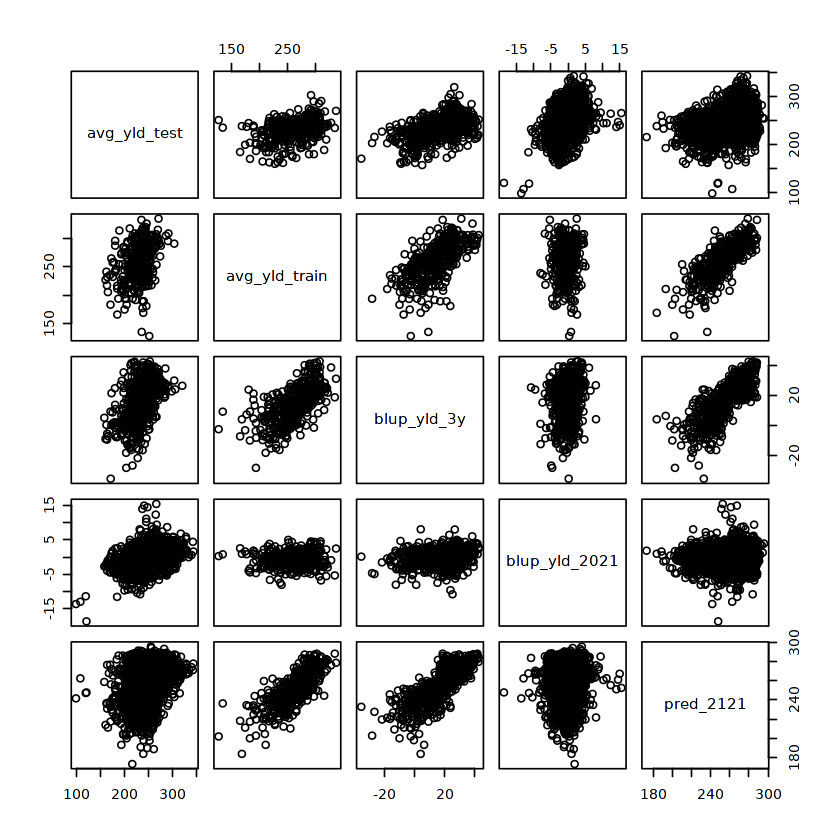

In [59]:
pred_train_envC <- predict(bst, as.matrix(train_hap[sub_train_raw$germ_origin,]))
pred_test_envC <- predict(bst, as.matrix(test_hap[sub_test_raw$germ_origin,]))
 
sub_test_raw$pred_2121 = pred_test_envC

# correlations of lines in the train
cor(sub_test_raw[,c(2,4,5:7)],use="na.or.complete")
pairs(sub_test_raw[,c(2,4,5:7)])
 
 
print(paste0("train: ",round(cor(pred_train_envC,sub_train_raw$avg_yld_train),3),
             ";test: ",round(cor(pred_test_envC,sub_test_raw$avg_yld_test,use = "na.or.complete"),3)))

In [60]:
# correlations by group (inTrain)
sub_test_raw  %>% group_by(inTrain)  %>% summarise(cor_avgTest_pred = cor(avg_yld_test,pred_2121), 
                                                   numOfLines = length(avg_yld_test))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3675822,4184
TRUE,0.4783421,428


In [61]:
dim(sub_test_raw)
head(sub_test_raw)

[1] 4612    7

,germ_origin,avg_yld_test,inTrain,avg_yld_train,blup_yld_3y,blup_yld_2021,pred_2121
,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
01DKD2WXT1A+LH326WXT1A1,01DKD2WXT1A+LH326WXT1A1,213.7938,FALSE,NA,-12.229,-3.017766,240.1584
16DAQ4-SQG-T1A1+LH324WXT2H,16DAQ4-SQG-T1A1+LH324WXT2H,232.5058,FALSE,NA,NA,-2.826998,224.5948
16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,200.5469,FALSE,NA,-10.320,-3.444458,228.8727
16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,211.0535,TRUE,216.5612,-12.286,-3.509920,222.8548
80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,213.8037,TRUE,235.2214,-16.552,-1.409344,220.2053
80DJD5-PGJ-T1B3+FOLU168,80DJD5-PGJ-T1B3+FOLU168,216.1873,FALSE,NA,-12.661,-7.982211,234.4278


In [62]:
dim(test_raw_mean)
head(test_raw_mean)

[1] 16238     8

,germ_origin,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap,inTrain,pred_hap_avg
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
01DHD10+LH287,01DHD10+LH287,197.4222,212.5745,NA,-15.661,NA,FALSE,NA
01DHD16+83INI14,01DHD16+83INI14,183.8176,201.1073,NA,-41.839,NA,FALSE,NA
01DKD2+19HGZ1,01DKD2+19HGZ1,193.8814,226.3426,NA,-5.917,NA,FALSE,NA
01DKD2+80IDM2,01DKD2+80IDM2,215.9325,224.6698,NA,-4.271,NA,FALSE,NA
01DKD2+93IDI3,01DKD2+93IDI3,204.4074,201.1833,NA,-14.926,NA,FALSE,NA
01DKD2+LH283,01DKD2+LH283,202.8045,206.4499,NA,-16.385,NA,FALSE,NA


In [63]:
test_raw_mean$avg_yld_2121 = sub_test_raw[test_raw_mean$germ_origin,'avg_yld_test']
test_raw_mean$pred_yld_2121 = sub_test_raw[test_raw_mean$germ_origin,'pred_2121']

In [65]:
dim(test_raw_mean)
head(test_raw_mean)

[1] 16238    10

,germ_origin,avg_yld_2021,avg_yld_3y,blup_yld_2021,blup_yld_6y,pred_hap,inTrain,pred_hap_avg,avg_yld_2121,pred_yld_2121
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
01DHD10+LH287,01DHD10+LH287,197.4222,212.5745,NA,-15.661,NA,FALSE,NA,NA,NA
01DHD16+83INI14,01DHD16+83INI14,183.8176,201.1073,NA,-41.839,NA,FALSE,NA,NA,NA
01DKD2+19HGZ1,01DKD2+19HGZ1,193.8814,226.3426,NA,-5.917,NA,FALSE,NA,NA,NA
01DKD2+80IDM2,01DKD2+80IDM2,215.9325,224.6698,NA,-4.271,NA,FALSE,NA,NA,NA
01DKD2+93IDI3,01DKD2+93IDI3,204.4074,201.1833,NA,-14.926,NA,FALSE,NA,NA,NA
01DKD2+LH283,01DKD2+LH283,202.8045,206.4499,NA,-16.385,NA,FALSE,NA,NA,NA


In [66]:
cor(test_raw_mean$avg_yld_2021,test_raw_mean$avg_yld_2121,use="na.or.complete")

[1] 0.5969388

In [67]:
cor(test_raw_mean[,c(2,6,8:10)],use="na.or.complete")

,avg_yld_2021,pred_hap,pred_hap_avg,avg_yld_2121,pred_yld_2121
avg_yld_2021,1.0000000,0.5895623,0.5514322,0.5969388,0.5494154
pred_hap,0.5895623,1.0000000,0.8957507,0.4032042,0.8352992
pred_hap_avg,0.5514322,0.8957507,1.0000000,0.3638734,0.8562883
avg_yld_2121,0.5969388,0.4032042,0.3638734,1.0000000,0.4149542
pred_yld_2121,0.5494154,0.8352992,0.8562883,0.4149542,1.0000000


In [68]:
sub_res = test_raw_mean %>% filter(!is.na(avg_yld_2021),!is.na(pred_hap),!is.na(pred_hap_avg),
                                   !is.na(avg_yld_2121),!is.na(pred_yld_2121))
dim(sub_res)

[1] 4612   10

In [69]:
# correlations by group (inTrain); avg_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2021),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_avg_yld_2021_pred_avg = cor(avg_yld_2021,pred_hap_avg), numOfLines = length(avg_yld_2021))

# correlations by group (inTrain); blup_yld_2021 & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2021),!is.na(pred_yld_2121)) %>% group_by(inTrain) %>% 
                summarise(cor_avg_yld_2021_pred_yld_2121 = cor(avg_yld_2021,pred_yld_2121), numOfLines = length(avg_yld_2021))

# correlations by group (inTrain); blup_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2121),!is.na(pred_hap_avg)) %>% group_by(inTrain) %>% 
                summarise(cor_avg_yld_2121_pred_avg = cor(avg_yld_2121,pred_hap_avg), numOfLines = length(avg_yld_2121))

# correlations by group (inTrain); avg_yld_3y & pred_hap
test_raw_mean %>% filter(!is.na(avg_yld_2121),!is.na(pred_yld_2121)) %>% group_by(inTrain) %>% 
                summarise(cor_avg_yld_2121_pred_yld_2121 = cor(avg_yld_2121,pred_yld_2121), numOfLines = length(avg_yld_2121))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg_yld_2021_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3801589,5891
TRUE,0.6175143,1066


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg_yld_2021_pred_yld_2121,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.5054083,3776
TRUE,0.6683949,836


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg_yld_2121_pred_avg,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3210161,3776
TRUE,0.4665570,836


`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avg_yld_2121_pred_yld_2121,numOfLines
<lgl>,<dbl>,<int>
FALSE,0.3659152,3776
TRUE,0.5065015,836


## train on all 21 related env, eg. 21_21, X_21 & 21_X

In [70]:
sub_train_raw = as.data.frame(train_raw %>% filter(str_detect(envC,"21"),germ_origin %in% row.names(train_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_train = mean(obs_value_YLD,na.rm=T)))
row.names(sub_train_raw) = sub_train_raw$germ_origin

`summarise()` ungrouping output (override with `.groups` argument)



In [71]:
dim(sub_train_raw)
head(sub_train_raw)

[1] 18358     2

,germ_origin,avg_yld_train
,<chr>,<dbl>
01DHD10+LH287,01DHD10+LH287,228.4638
01DHD16+83INI14,01DHD16+83INI14,201.7601
01DKD2+19HGZ1,01DKD2+19HGZ1,216.1301
01DKD2+80IDM2,01DKD2+80IDM2,232.2502
01DKD2+93IDI3,01DKD2+93IDI3,206.6251
01DKD2+LH283,01DKD2+LH283,211.8696


In [ ]:
num_leaves = 30
nrounds = 900
 
bst <- lightgbm(
  data = as.matrix(train_hap[sub_train_raw$germ_origin,]) 
  , params = train_params
  , label = sub_train_raw$avg_yld_train
  , nrounds = nrounds
  , verbose = 0
)
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_contains21_",num_leaves,"_",nrounds,".txt"))

In [72]:
bst = lgb.load(paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_contains21_",num_leaves,"_",nrounds,".txt"))

,avg_yld_test,avg_yld_train,blup_yld_3y,blup_yld_2021,pred_2121
avg_yld_test,1.0000000,0.37880714,0.5305941,0.15129610,0.49538633
avg_yld_train,0.3788071,1.00000000,0.6464802,0.05120918,0.64509456
blup_yld_3y,0.5305941,0.64648021,1.0000000,0.14662089,0.80230235
blup_yld_2021,0.1512961,0.05120918,0.1466209,1.00000000,0.04591038
pred_2121,0.4953863,0.64509456,0.8023023,0.04591038,1.00000000


[1] "train: 0.631;test: 0.411"


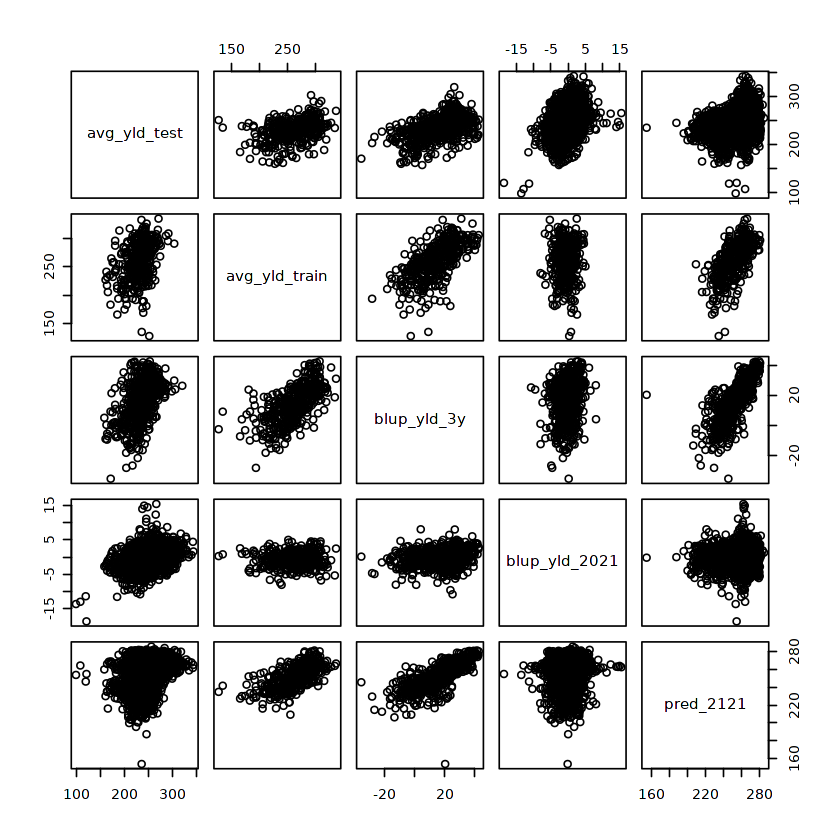

In [73]:
pred_train_envC <- predict(bst, as.matrix(train_hap[sub_train_raw$germ_origin,]))
pred_test_envC <- predict(bst, as.matrix(test_hap[sub_test_raw$germ_origin,]))
 
sub_test_raw$pred_2121 = pred_test_envC

# correlations of lines in the train
cor(sub_test_raw[,c(2,4,5:7)],use="na.or.complete")
pairs(sub_test_raw[,c(2,4,5:7)])
 
 
print(paste0("train: ",round(cor(pred_train_envC,sub_train_raw$avg_yld_train),3),
             ";test: ",round(cor(pred_test_envC,sub_test_raw$avg_yld_test,use = "na.or.complete"),3)))

In [74]:
# correlations by group (inTrain)
sub_test_raw  %>% group_by(inTrain)  %>% summarise(cor_avgTest_pred = cor(avg_yld_test,pred_2121))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred
<lgl>,<dbl>
FALSE,0.3705719
TRUE,0.4955371


## train on 8_21, 21_28, and predict on 21_21

In [75]:
sub_train_raw = as.data.frame(train_raw %>% filter(envC %in% c("21_28","8_21"),germ_origin %in% row.names(train_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_train = mean(obs_value_YLD,na.rm=T)))
row.names(sub_train_raw) = sub_train_raw$germ_origin
dim(sub_train_raw)
head(sub_train_raw)

`summarise()` ungrouping output (override with `.groups` argument)



[1] 9353    2

,germ_origin,avg_yld_train
,<chr>,<dbl>
01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,269.6432
16DAQ5-QPT-T1C2+HILU604-SQG-T1B1,16DAQ5-QPT-T1C2+HILU604-SQG-T1B1,275.4896
16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,16DAQ5-QPT-T1C2+JAMI702-SQG-T1B1,226.6399
16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,16DAQ5-SQG-T1A1+HILU604-SQG-T1B1,209.0378
80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,80DJD5-PGJ-T1B3+DINO359-XJW-T1B1,230.0485
80DJD5-PGJ-T1B3+FOLI129-VSS-T1A2,80DJD5-PGJ-T1B3+FOLI129-VSS-T1A2,266.3046


In [ ]:
num_leaves = 30
nrounds = 900
 
bst <- lightgbm(
  data = as.matrix(train_hap[sub_train_raw$germ_origin,]) 
  , params = train_params
  , label = sub_train_raw$avg_yld_train
  , nrounds = nrounds
  , verbose = 0
)
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_8_21_21_28_",num_leaves,"_",nrounds,".txt"))

In [76]:
bst = lgb.load(paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_8_21_21_28_",num_leaves,"_",nrounds,".txt"))

,avg_yld_test,avg_yld_train,blup_yld_3y,blup_yld_2021,pred_2121
avg_yld_test,1.0000000,0.37880714,0.5305941,0.15129610,0.38986921
avg_yld_train,0.3788071,1.00000000,0.6464802,0.05120918,0.55599688
blup_yld_3y,0.5305941,0.64648021,1.0000000,0.14662089,0.66601519
blup_yld_2021,0.1512961,0.05120918,0.1466209,1.00000000,0.04573317
pred_2121,0.3898692,0.55599688,0.6660152,0.04573317,1.00000000


[1] "train: 0.718;test: 0.345"


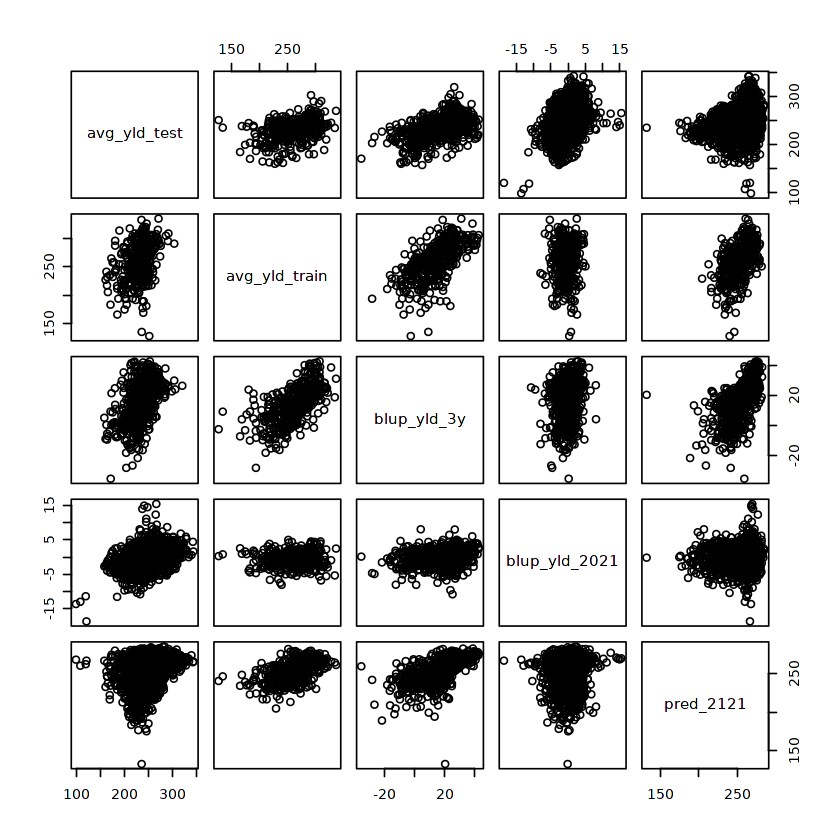

In [77]:
pred_train_envC <- predict(bst, as.matrix(train_hap[sub_train_raw$germ_origin,]))
pred_test_envC <- predict(bst, as.matrix(test_hap[sub_test_raw$germ_origin,]))
 
sub_test_raw$pred_2121 = pred_test_envC

# correlations of lines in the train
cor(sub_test_raw[,c(2,4,5:7)],use="na.or.complete")
pairs(sub_test_raw[,c(2,4,5:7)])
 
 
print(paste0("train: ",round(cor(pred_train_envC,sub_train_raw$avg_yld_train),3),
             ";test: ",round(cor(pred_test_envC,sub_test_raw$avg_yld_test,use = "na.or.complete"),3)))

In [78]:
# correlations by group (inTrain)
sub_test_raw  %>% group_by(inTrain)  %>% summarise(cor_avgTest_pred = cor(avg_yld_test,pred_2121))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred
<lgl>,<dbl>
FALSE,0.3156593
TRUE,0.3902728


## train only on the same soil

In [79]:
sub_train_raw = as.data.frame(train_raw %>% filter(str_detect(envC,"_21"),germ_origin %in% row.names(train_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_train = mean(obs_value_YLD,na.rm=T)))
row.names(sub_train_raw) = sub_train_raw$germ_origin

`summarise()` ungrouping output (override with `.groups` argument)



In [81]:
dim(sub_train_raw)
head(sub_train_raw)

[1] 12813     2

,germ_origin,avg_yld_train
,<chr>,<dbl>
01DHD10+LH287,01DHD10+LH287,219.8352
01DHD16+83INI14,01DHD16+83INI14,201.7601
01DKD2+80IDM2,01DKD2+80IDM2,220.4672
01DKD2+93IDI3,01DKD2+93IDI3,218.1020
01DKD2+LH283,01DKD2+LH283,249.5340
01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,01DKD2CCR-MON89034-WXT1B2+HILU604-SQG-T1B1,233.5011


In [82]:
num_leaves = 30
nrounds = 900
 
bst <- lightgbm(
  data = as.matrix(train_hap[sub_train_raw$germ_origin,]) 
  , params = train_params
  , label = sub_train_raw$avg_yld_train
  , nrounds = nrounds
  , verbose = 0
)
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hap_envC_8_21_21_28_",num_leaves,"_",nrounds,".txt"))

Warning message in (function (params = list(), data, nrounds = 100L, valids = list(), :
“Early stopping is not available in 'dart' mode.”


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 14.863599 seconds.
You can set `force_col_wise=true` to remove the overhead.


,avg_yld_test,avg_yld_train,blup_yld_3y,blup_yld_2021,pred_2121
avg_yld_test,1.0000000,0.37880714,0.5305941,0.15129610,0.42540389
avg_yld_train,0.3788071,1.00000000,0.6464802,0.05120918,0.80034125
blup_yld_3y,0.5305941,0.64648021,1.0000000,0.14662089,0.72887103
blup_yld_2021,0.1512961,0.05120918,0.1466209,1.00000000,0.07514113
pred_2121,0.4254039,0.80034125,0.7288710,0.07514113,1.00000000


[1] "train: 0.877;test: 0.386"


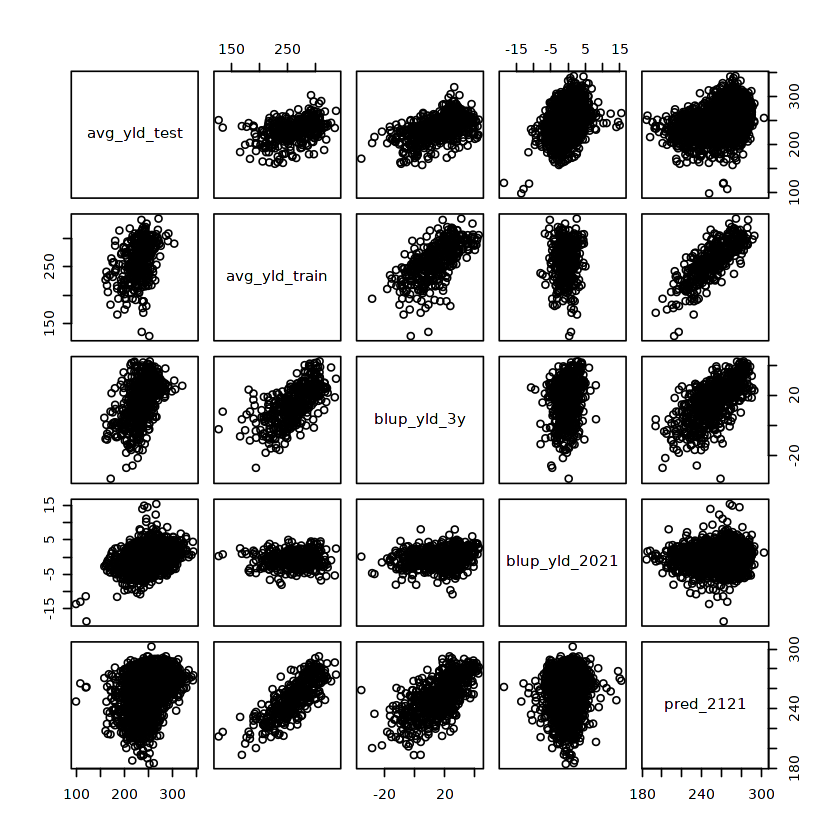

In [83]:
pred_train_envC <- predict(bst, as.matrix(train_hap[sub_train_raw$germ_origin,]))
pred_test_envC <- predict(bst, as.matrix(test_hap[sub_test_raw$germ_origin,]))
 
sub_test_raw$pred_2121 = pred_test_envC

# correlations of lines in the train
cor(sub_test_raw[,c(2,4,5:7)],use="na.or.complete")
pairs(sub_test_raw[,c(2,4,5:7)])
 
 
print(paste0("train: ",round(cor(pred_train_envC,sub_train_raw$avg_yld_train),3),
             ";test: ",round(cor(pred_test_envC,sub_test_raw$avg_yld_test,use = "na.or.complete"),3)))

In [84]:
# correlations by group (inTrain)
sub_test_raw  %>% group_by(inTrain)  %>% summarise(cor_avgTest_pred = cor(avg_yld_test,pred_2121))

`summarise()` ungrouping output (override with `.groups` argument)



inTrain,cor_avgTest_pred
<lgl>,<dbl>
FALSE,0.3454344
TRUE,0.4254830


# Test probability-based prediction

In [ ]:
ast_prob_f = readRDS("/mnt/ML_HBLUP/NA_RM105_110_115/data/astProb_female.rds")
ast_prob_m = readRDS("/mnt/ML_HBLUP/NA_RM105_110_115/data/astProb_male.rds")

In [ ]:
colnames(ast_prob_f) = paste0(colnames(ast_prob_f),"_f")
colnames(ast_prob_m) = paste0(colnames(ast_prob_m),"_m")

In [ ]:
head(ast_prob_f)

In [ ]:
sub_train_raw = as.data.frame(train_raw %>% filter(envC == "21_21",germ_origin %in% row.names(train_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_train = mean(obs_value_YLD,na.rm=T)))
row.names(sub_train_raw) = sub_train_raw$germ_origin
 
sub_test_raw = as.data.frame(test_raw %>% filter(envC == "21_21",germ_origin %in% row.names(test_hap)) %>% 
  group_by(germ_origin) %>% summarise(avg_yld_test = mean(obs_value_YLD,na.rm=T)))
row.names(sub_test_raw) = sub_test_raw$germ_origin

In [ ]:
dim(sub_train_raw)
dim(sub_test_raw)
head(sub_train_raw)

In [ ]:
sub_train_raw$female = sapply(sub_train_raw$germ_origin,function(x){return(unlist(strsplit(x,"\\+"))[1])})
sub_train_raw$male = sapply(sub_train_raw$germ_origin,function(x){return(unlist(strsplit(x,"\\+"))[2])})
sub_test_raw$female = sapply(sub_test_raw$germ_origin,function(x){return(unlist(strsplit(x,"\\+"))[1])})
sub_test_raw$male = sapply(sub_test_raw$germ_origin,function(x){return(unlist(strsplit(x,"\\+"))[2])})

In [ ]:
head(sub_train_raw)

In [ ]:
table(sub_train_raw$female %in% row.names(ast_prob_f), sub_train_raw$male %in% row.names(ast_prob_m))
table(sub_test_raw$female %in% row.names(ast_prob_f), sub_test_raw$male %in% row.names(ast_prob_m))

In [ ]:
sub_train_raw = sub_train_raw %>% filter(female %in% row.names(ast_prob_f), male %in% row.names(ast_prob_m))
dim(sub_train_raw)

In [ ]:
trainHap = cbind(ast_prob_f[sub_train_raw$female,],ast_prob_m[sub_train_raw$male,])
testHap = cbind(ast_prob_f[sub_test_raw$female,],ast_prob_m[sub_test_raw$male,])

In [ ]:
dim(trainHap)
dim(testHap)

In [ ]:
num_leaves = 30
nrounds = 900
 
bst <- lightgbm(
  data = as.matrix(trainHap) 
  , params = train_params
  , label = sub_train_raw$avg_yld_train
  , nrounds = nrounds
  , verbose = 0
)
lgb.save(bst, paste0("/mnt/ML_HBLUP/NA_RM105_110_115/models/lightGBM_hapProb_envC_21_21_",num_leaves,"_",nrounds,".txt"))

In [ ]:
pred_train_envC <- predict(bst, as.matrix(trainHap))
pred_test_envC <- predict(bst, as.matrix(testHap))
 
sub_test_raw$pred_2121 = pred_test_envC

print(paste0("train: ",round(cor(pred_train_envC,sub_train_raw$avg_yld_train),3),
             ";test: ",round(cor(pred_test_envC,sub_test_raw$avg_yld_test,use = "na.or.complete"),3)))

In [ ]:
# correlations by group (inTrain)
sub_test_raw$inTrain = sub_test_raw$germ_origin %in% sub_train_raw$germ_origin
sub_test_raw  %>% group_by(inTrain)  %>% summarise(cor_avgTest_pred = cor(avg_yld_test,pred_2121))